In [ ]:
# Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the Dataset
df = pd.read_csv("/content/Standard Metropolitan Areas Dataset (1).csv")

In [ ]:
df.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


**Data Visusalization**

<Axes: >

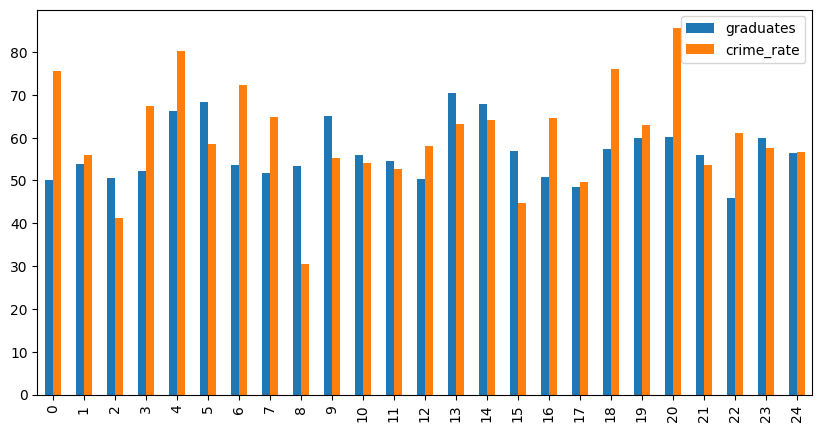

In [ ]:
# 1) Graduates V/S crime rate Bar Graph
df1 = df[['graduates','crime_rate']]
df1.iloc[0:25,:].plot(kind='bar',figsize = (10,5))  # First "25" rows

<Axes: >

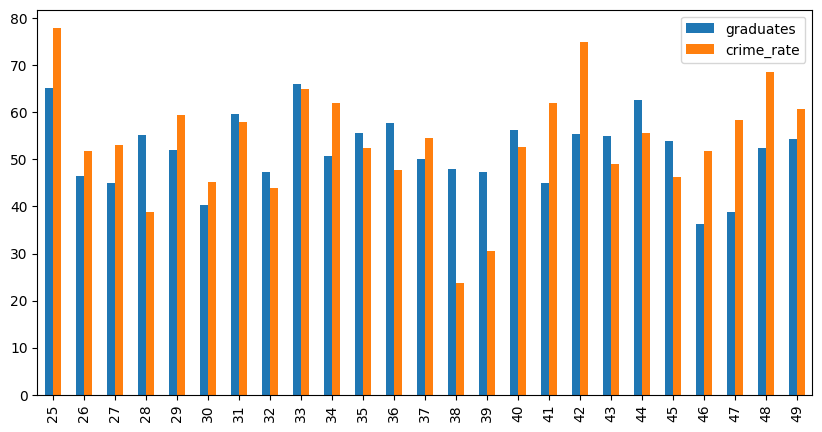

In [ ]:
df2 = df[['graduates','crime_rate']]
df2.iloc[25:50,:].plot(kind='bar',figsize = (10,5))  #  "25" to "50" rows

It is clear from the above plots that most of the graduates are involved in crimes.

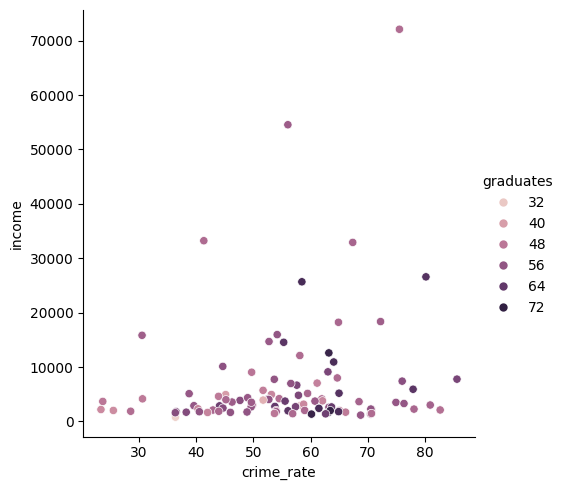

In [ ]:
# 2) Crime rate V/S Income of Graduates Scatter plot
sns.relplot(x='crime_rate',y='income',hue='graduates',data =df)

Scatter plot shows that most of the crime are done by graduates having income less than 20000 million US Dollar

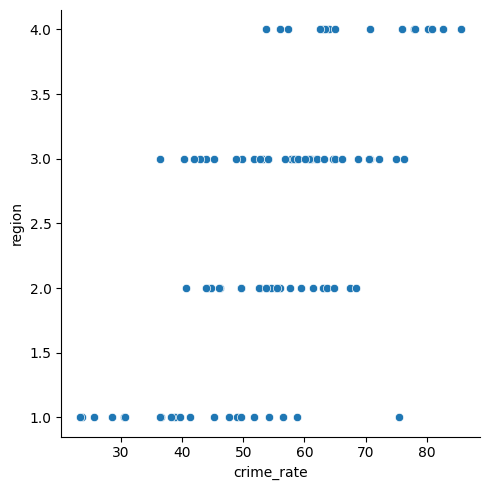

In [ ]:
# 3) Crime rate V/S Region Scatter plot
sns.relplot(x='crime_rate',y='region',data =df)

It shows almost all the region have significant crime rates although region 3 i.e. South U.S have very high crime rate

region
1    202752
2    179307
3    178660
4     67522
Name: hospital_beds, dtype: int64

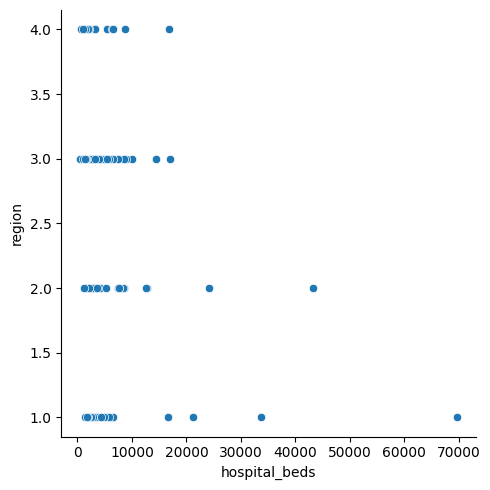

In [ ]:
# 4) Hospital Bed V/S Region Scatter plot
sns.relplot(x='hospital_beds',y='region',data =df)
df.groupby('region')['hospital_beds'].sum()

The number of beds available in the region "4" is the least one however crime rate percentage was very high in the same.

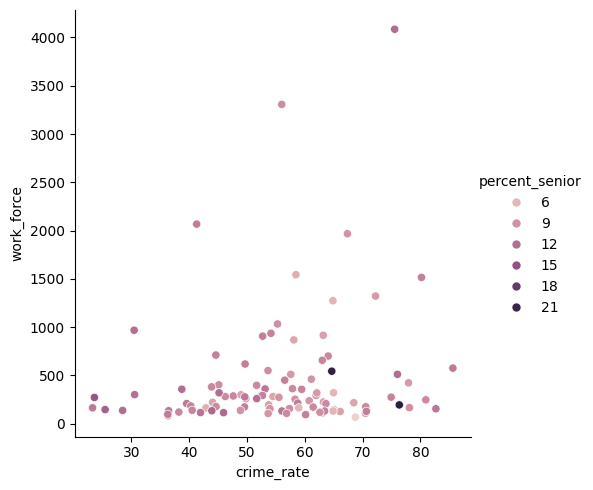

In [ ]:
# crime rate V/S work force
sns.relplot(x='crime_rate',y='work_force',hue = "percent_senior",data =df)

It is clear from the above plot that the regions having very less work force or we can say that unemployed youth is involved in more crimes.

<Axes: >

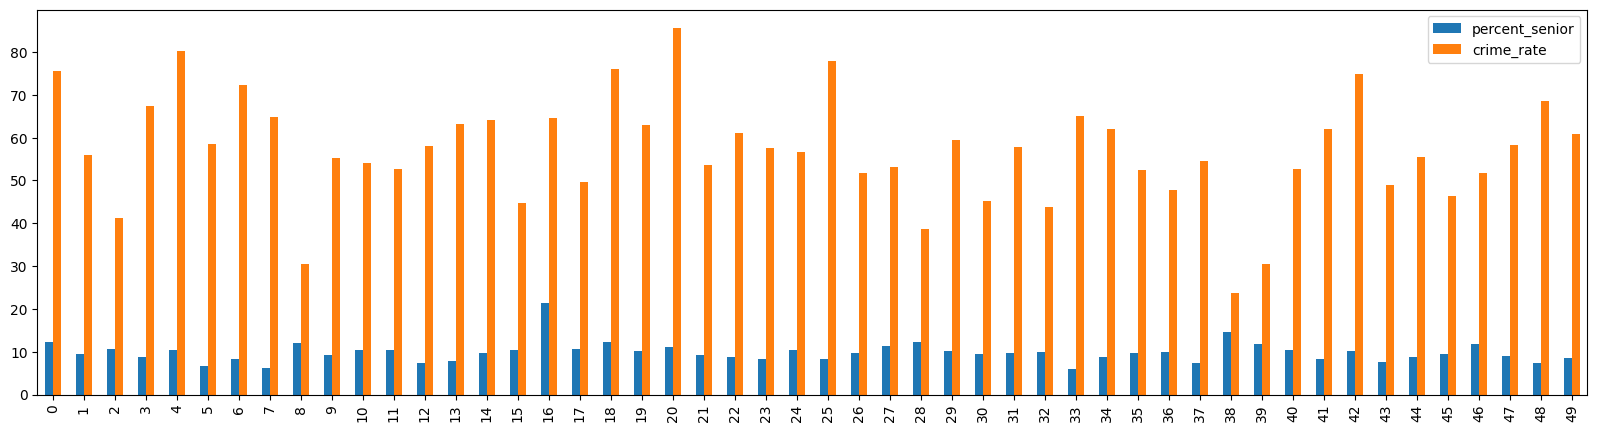

In [ ]:
df_senior = df[['percent_senior','crime_rate']]
df_senior.iloc[0:50,:].plot(kind='bar',figsize = (20,5))

The graph want to convey that the crime rate is higher in areas with a higher percentage of senior citizens (people 65 years and older).

**Prediction Through Machine Learning Model**

**Step- 1 Gathering the data**

In [56]:
df = pd.read_csv("/content/Standard Metropolitan Areas Dataset (1).csv")

In [57]:
df.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


**Step-2 Data Preprocessing**

In [ ]:
# Since our datset contains all the numerical data so there is no need to convert anything and we can easily made our linear regression model out of it

In [58]:
# Checking correlations
df.corr()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
land_area,1.000000,-0.077320,0.092226,0.085054,0.081034,0.088728,0.135792,0.111404,0.292392,0.293907
percent_city,-0.077320,1.000000,-0.250995,0.067391,0.052898,0.076720,0.016011,0.019235,0.235880,0.159596
percent_senior,0.092226,-0.250995,1.000000,0.056454,0.083775,-0.155695,0.035240,0.046073,-0.242811,-0.177992
physicians,0.085054,0.067391,0.056454,1.000000,0.974241,0.049500,0.965597,0.976209,-0.140961,0.187763
hospital_beds,0.081034,0.052898,0.083775,0.974241,1.000000,-0.003892,0.967913,0.974416,-0.220305,0.109799
graduates,0.088728,0.076720,-0.155695,0.049500,-0.003892,1.000000,0.044054,0.045578,0.246226,0.290880
work_force,0.135792,0.016011,0.035240,0.965597,0.967913,0.044054,1.000000,0.996735,-0.144022,0.175945
income,0.111404,0.019235,0.046073,0.976209,0.974416,0.045578,0.996735,1.000000,-0.152016,0.175797
region,0.292392,0.235880,-0.242811,-0.140961,-0.220305,0.246226,-0.144022,-0.152016,1.000000,0.636192
crime_rate,0.293907,0.159596,-0.177992,0.187763,0.109799,0.290880,0.175945,0.175797,0.636192,1.000000


**Step - 3 Dividing the data into dependent and independent variables**

In [59]:
x = df[['land_area','percent_city','percent_senior','physicians','hospital_beds','graduates','work_force','income','region']] # independent variables
y = df['crime_rate'] # Dependent variable

In [60]:
x.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4


In [61]:
y.head()

0    75.55
1    56.03
2    41.32
3    67.38
4    80.19
Name: crime_rate, dtype: float64

**Step- 4 Splitting the data into training and testing sets**

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

**Building the model using Linear Regression Algorithm**

In [63]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  # activating our linear regression algorithm

In [64]:
# training our linear regression model using .fit ()
regressor.fit(x_train,y_train)

LinearRegression()

In [65]:
# testing our linear_regression model using .predict()
predictions = regressor.predict(x_test)

In [66]:
# checking the accuracy of our model
regressor.score(x,y)

0.5057335126506217

In [67]:
#use the model on top of the New area data
new_data = {'land_area':2000,'percent_city':80,'percent_senior':5,'physicians':10000,'hospital_beds':20000,
            'graduates':70,'work_force':1100,'income':20000,'region':3}
index=[1] # serial number


In [68]:
# convert the dictionary into data frame
my_data =pd.DataFrame(new_data,index)

In [69]:
my_data

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region
1,2000,80,5,10000,20000,70,1100,20000,3


In [70]:
# predicting the crime rate in new area
new_predictions = regressor.predict(my_data)
print("the crime rate in the new area is ",new_predictions)

the crime rate in the new area is  [75.8530557]
